#BG2


#DATA CLEANING

In [3]:
import pandas as pd

In [66]:
import pandas as pd
df=pd.read_excel("/content/BG2 1Sep22-1Sep23.xlsx")
df=df.drop_duplicates()
# duplicates should be dropped

In [67]:
df=df.drop_duplicates()

In [68]:
df.shape
df

,dt,values
0,2022-09-01 00:00:00,565.24
1,2022-09-01 01:00:00,515.96
2,2022-09-01 02:00:00,507.80
3,2022-09-01 03:00:00,625.86
4,2022-09-01 04:00:00,772.08
...,...,...
8730,2023-08-31 19:00:00,813.44
8731,2023-08-31 20:00:00,799.28
8732,2023-08-31 21:00:00,765.26
8733,2023-08-31 22:00:00,739.28


In [69]:
#Splitting the column
df['year'] = df['dt'].dt.year
df['month'] = df['dt'].dt.month
df['day'] = df['dt'].dt.day
df['time'] = df['dt'].dt.time
df['minutes']=df['dt'].dt.minute
df['seconds']=df['dt'].dt.second
df['hours']=df['dt'].dt.hour
zeros_minute_count=(df['minutes']==0).sum()
print(zeros_minute_count)
zeros_second_count=(df['seconds']==0).sum()
print(zeros_second_count)
zeros_hour_count=(df['hours']==0).sum()
print(zeros_hour_count)
df

8735
8735
364


,dt,values,year,month,day,time,minutes,seconds,hours
0,2022-09-01 00:00:00,565.24,2022,9,1,00:00:00,0,0,0
1,2022-09-01 01:00:00,515.96,2022,9,1,01:00:00,0,0,1
2,2022-09-01 02:00:00,507.80,2022,9,1,02:00:00,0,0,2
3,2022-09-01 03:00:00,625.86,2022,9,1,03:00:00,0,0,3
4,2022-09-01 04:00:00,772.08,2022,9,1,04:00:00,0,0,4
...,...,...,...,...,...,...,...,...,...
8730,2023-08-31 19:00:00,813.44,2023,8,31,19:00:00,0,0,19
8731,2023-08-31 20:00:00,799.28,2023,8,31,20:00:00,0,0,20
8732,2023-08-31 21:00:00,765.26,2023,8,31,21:00:00,0,0,21
8733,2023-08-31 22:00:00,739.28,2023,8,31,22:00:00,0,0,22


In [70]:
df=df.drop(columns="minutes")
df=df.drop(columns="seconds")
df=df.drop(columns="time")
df=df.drop(columns="dt")
df

,values,year,month,day,hours
0,565.24,2022,9,1,0
1,515.96,2022,9,1,1
2,507.80,2022,9,1,2
3,625.86,2022,9,1,3
4,772.08,2022,9,1,4
...,...,...,...,...,...
8730,813.44,2023,8,31,19
8731,799.28,2023,8,31,20
8732,765.26,2023,8,31,21
8733,739.28,2023,8,31,22


# PER DAY ANALYSIS

In [71]:
Hourly_average_consumption = df.groupby(['year', 'month', 'day'])['values'].mean()
Hourly_average_consumption_df = Hourly_average_consumption.reset_index()
Hourly_average_consumption_df = Hourly_average_consumption_df.rename(columns={'values': 'Hourly_average_consumption'})
Hourly_average_consumption_df

,year,month,day,Hourly_average_consumption
0,2022,9,1,692.205000
1,2022,9,2,733.895833
2,2022,9,3,727.480833
3,2022,9,4,689.232500
4,2022,9,5,699.410000
...,...,...,...,...
359,2023,8,27,760.878333
360,2023,8,28,737.462500
361,2023,8,29,765.315833
362,2023,8,30,760.040833


In [72]:
Hourly_maximum_consumption= df.groupby(['year','month','day'])['values'].max()
Hourly_maximum_consumption_df=Hourly_maximum_consumption.reset_index()
Hourly_maximum_consumption_df=Hourly_maximum_consumption_df.rename(columns={'values' :'Hourly_maximum_consumption' })
Hourly_maximum_consumption_df

,year,month,day,Hourly_maximum_consumption
0,2022,9,1,849.80
1,2022,9,2,885.50
2,2022,9,3,954.72
3,2022,9,4,879.84
4,2022,9,5,866.56
...,...,...,...,...
359,2023,8,27,1050.98
360,2023,8,28,1041.84
361,2023,8,29,1109.46
362,2023,8,30,918.06


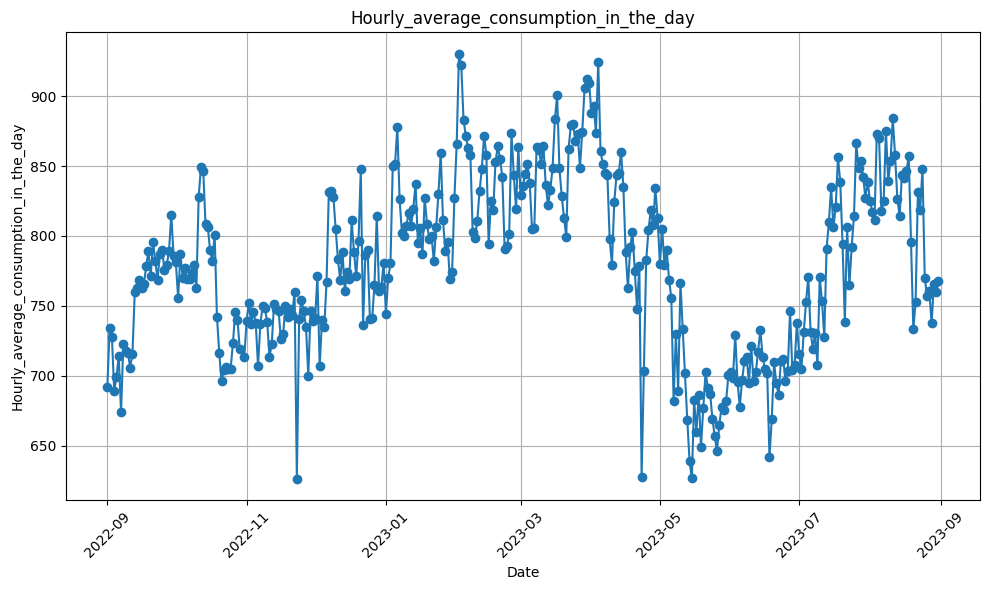

In [73]:
import matplotlib.pyplot as plt

# Assuming you have daily_average_df DataFrame

# Convert 'year', 'month', and 'day' columns to datetime format
Hourly_average_consumption_df['date'] = pd.to_datetime(Hourly_average_consumption_df[['year', 'month', 'day']])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(Hourly_average_consumption_df['date'], Hourly_average_consumption_df['Hourly_average_consumption'], marker='o', linestyle='-')
plt.title('Hourly_average_consumption_in_the_day')
plt.xlabel('Date')
plt.ylabel('Hourly_average_consumption_in_the_day')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

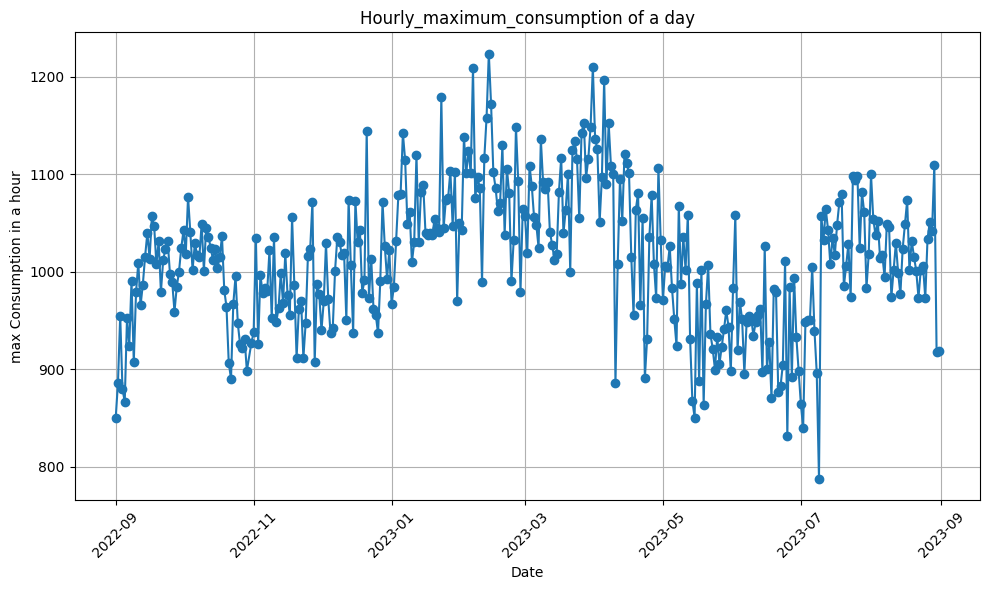

In [74]:
import matplotlib.pyplot as plt

# Assuming you have daily_average_df DataFrame

# Convert 'year', 'month', and 'day' columns to datetime format
Hourly_maximum_consumption_df['date'] = pd.to_datetime(Hourly_maximum_consumption_df[['year', 'month', 'day']])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(Hourly_maximum_consumption_df['date'], Hourly_maximum_consumption_df['Hourly_maximum_consumption'], marker='o', linestyle='-')
plt.title('Hourly_maximum_consumption of a day')
plt.xlabel('Date')
plt.ylabel('max Consumption in a hour')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [75]:
daily_sum= df.groupby(['year','month','day'])['values'].sum()
daily_sum_df=daily_sum.reset_index()
daily_sum_df=daily_sum_df.rename(columns={'values' :'total of the day' })
daily_sum_df

,year,month,day,total of the day
0,2022,9,1,16612.92
1,2022,9,2,17613.50
2,2022,9,3,17459.54
3,2022,9,4,16541.58
4,2022,9,5,16785.84
...,...,...,...,...
359,2023,8,27,18261.08
360,2023,8,28,17699.10
361,2023,8,29,18367.58
362,2023,8,30,18240.98


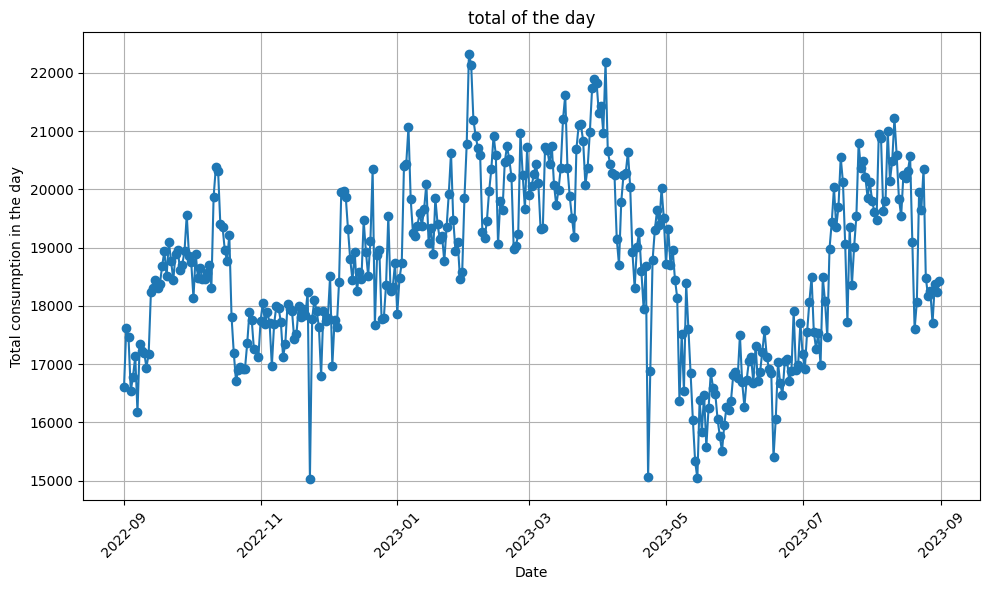

In [76]:
import matplotlib.pyplot as plt

# Assuming you have daily_average_df DataFrame

# Convert 'year', 'month', and 'day' columns to datetime format
daily_sum_df['date'] = pd.to_datetime(daily_sum_df[['year', 'month', 'day']])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(daily_sum_df['date'], daily_sum_df['total of the day'], marker='o', linestyle='-')
plt.title('total of the day')
plt.xlabel('Date')
plt.ylabel('Total consumption in the day')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#PER MONTH ANALYSIS

In [77]:
Daily_average_consumption = daily_sum_df.groupby(['year', 'month'])['total of the day'].mean()
Daily_average_consumption_df=Daily_average_consumption.reset_index()
Daily_average_consumption_df=Daily_average_consumption_df.rename(columns={'total of the day':'Daily_average_consumption'})
Daily_average_consumption_df

,year,month,Daily_average_consumption
0,2022,9,18028.074000
1,2022,10,18282.151333
2,2022,11,17649.914667
3,2022,12,18653.321290
4,2023,1,19398.761935
5,2023,2,20273.771429
6,2023,3,20469.776774
7,2023,4,19522.688000
8,2023,5,16818.197419
9,2023,6,16902.621333


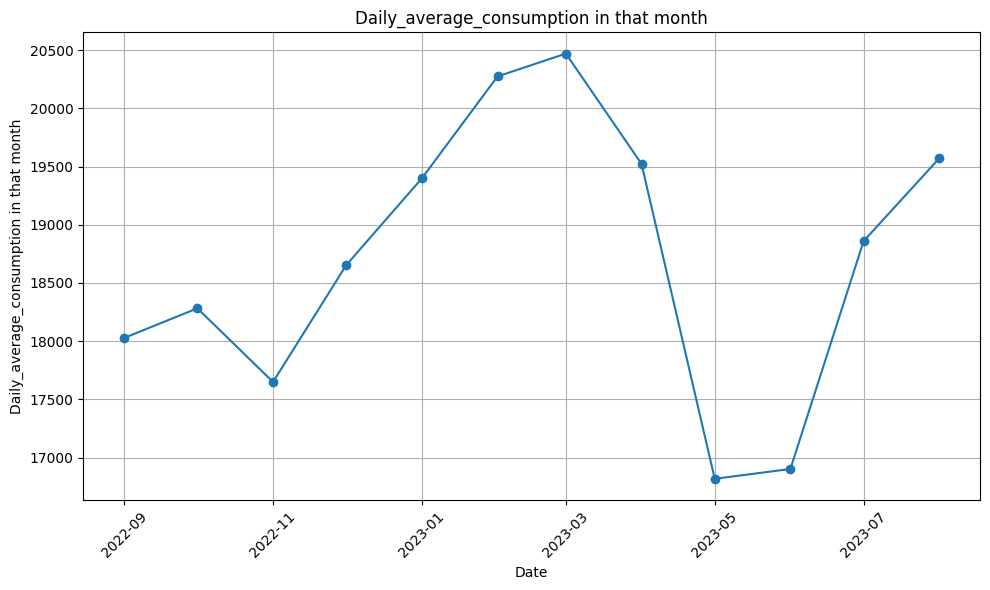

In [78]:
import matplotlib.pyplot as plt

# Assuming you have daily_average_df DataFrame

# Convert 'year', 'month', and 'day' columns to datetime format
Daily_average_consumption_df['date'] = pd.to_datetime({'year': Daily_average_consumption_df['year'], 'month': Daily_average_consumption_df['month'], 'day': 1})


# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(Daily_average_consumption_df['date'], Daily_average_consumption_df['Daily_average_consumption'], marker='o', linestyle='-')
plt.title('Daily_average_consumption in that month')
plt.xlabel('Date')
plt.ylabel('Daily_average_consumption in that month')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [79]:
monthly_total = daily_sum_df.groupby(['year', 'month'])['total of the day'].sum()
monthly_total_df=monthly_total.reset_index()
monthly_total_df=monthly_total_df.rename(columns={'total of the day':'monthly_total'})
monthly_total_df

,year,month,monthly_total
0,2022,9,540842.22
1,2022,10,548464.54
2,2022,11,529497.44
3,2022,12,578252.96
4,2023,1,601361.62
5,2023,2,567665.60
6,2023,3,634563.08
7,2023,4,585680.64
8,2023,5,521364.12
9,2023,6,507078.64


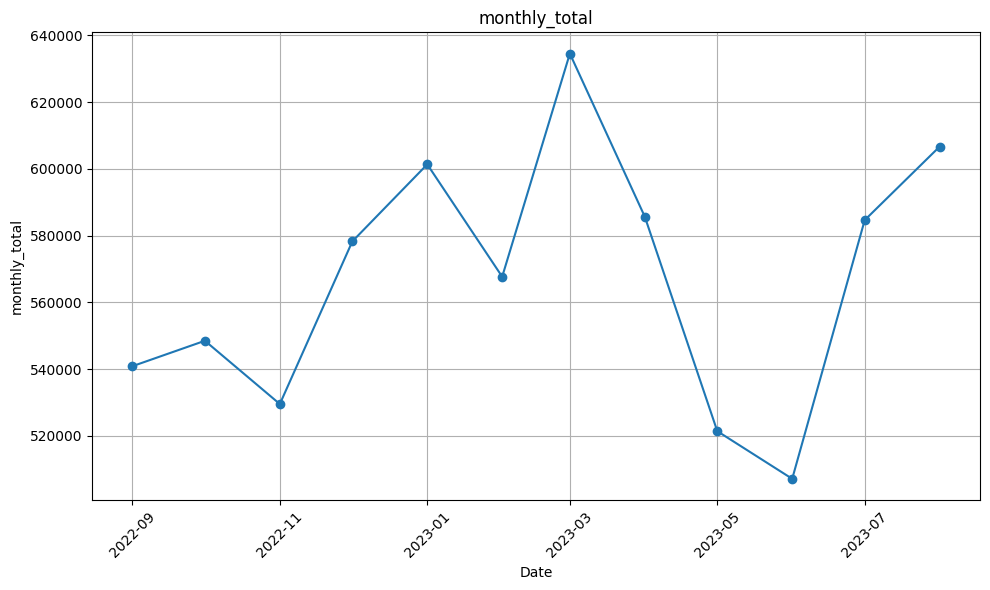

In [80]:
import matplotlib.pyplot as plt

# Assuming you have daily_average_df DataFrame

# Convert 'year', 'month', and 'day' columns to datetime format
monthly_total_df['date'] = pd.to_datetime({'year': monthly_total_df['year'], 'month': monthly_total_df['month'], 'day': 1})


# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(monthly_total_df['date'], monthly_total_df['monthly_total'], marker='o', linestyle='-')
plt.title('monthly_total')
plt.xlabel('Date')
plt.ylabel('monthly_total')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [81]:
Daily_maximum_consumption = daily_sum_df.groupby(['year', 'month'])['total of the day'].max()
Daily_maximum_consumption_df=Daily_maximum_consumption.reset_index()
Daily_maximum_consumption_df=Daily_maximum_consumption_df.rename(columns={'total of the day':'maximum in any day'})
Daily_maximum_consumption_df

,year,month,maximum in any day
0,2022,9,19563.52
1,2022,10,20377.68
2,2022,11,18244.82
3,2022,12,20342.56
4,2023,1,21066.26
5,2023,2,22329.68
6,2023,3,21900.60
7,2023,4,22191.88
8,2023,5,19325.58
9,2023,6,17909.86


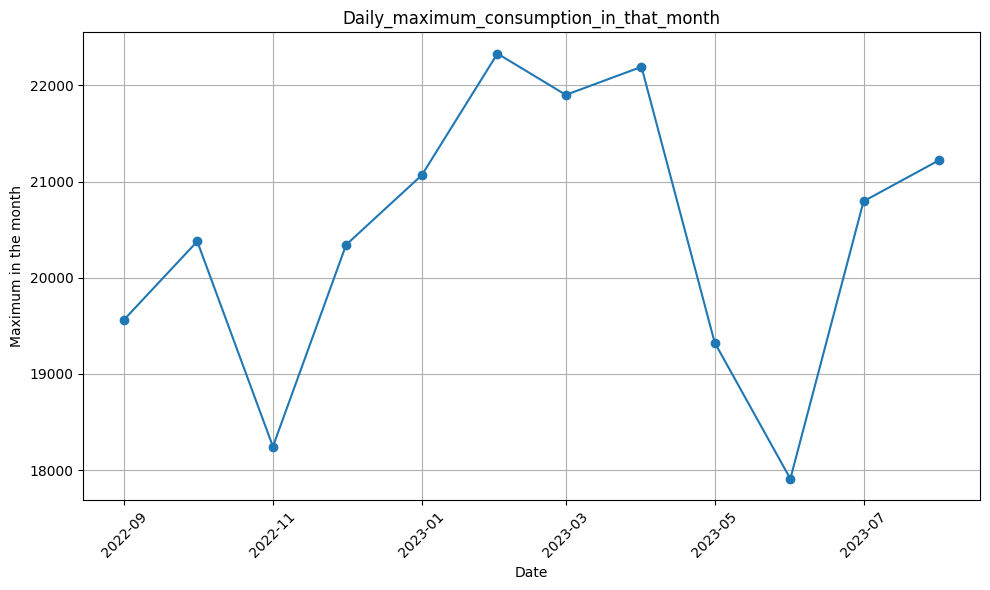

In [82]:
import matplotlib.pyplot as plt

# Assuming you have daily_average_df DataFrame

# Convert 'year', 'month', and 'day' columns to datetime format
Daily_maximum_consumption_df['date'] = pd.to_datetime({'year': Daily_maximum_consumption_df['year'], 'month': Daily_maximum_consumption_df['month'], 'day': 1})


# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(Daily_maximum_consumption_df['date'], Daily_maximum_consumption_df['maximum in any day'], marker='o', linestyle='-')
plt.title('Daily_maximum_consumption_in_that_month')
plt.xlabel('Date')
plt.ylabel('Maximum in the month')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Yearly anaysis

In [83]:
Monthly_average_consumption = monthly_total_df.groupby(['year'])['monthly_total'].mean()

In [84]:
Monthly_average_consumption

year
2022    549264.2900
2023    576129.3725
Name: monthly_total, dtype: float64

In [85]:
mean_daily_consumption = daily_sum_df['total of the day'].mean()
print(mean_daily_consumption)

18698.05532967033


In [86]:
mean_monthly_consumption=monthly_total_df['monthly_total'].mean()
print(mean_monthly_consumption)

567174.3449999999
